In [43]:
import pickle
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

In [44]:
import sys
sys.path.append('../')

### breakdown of lethality

In [5]:
dir_in_res = '../out/20.0216 feat/reg_rf_boruta'
dir_in_anlyz = os.path.join(dir_in_res, 'anlyz_filtered')
df_featSummary = pd.read_csv(os.path.join(dir_in_anlyz, 'feat_summary.csv')) #feature summary
df_featSummary['feat_sources'] = df_featSummary['feat_sources'].apply(literal_eval)
df_featSummary['feat_genes'] = df_featSummary['feat_genes'].apply(literal_eval)

In [6]:
df_counts = df_featSummary.groupby('feat_source1')['feat_source1'].count()
df_counts = df_counts.to_dict()
df_sl = pd.DataFrame([{'new_syn_lethal':df_counts['CERES'],
                       'classic_syn_lethal': sum([df_counts[k] for k in ['CN','Mut','RNA-seq']]) }])
df_sl = df_sl.T.squeeze()

In [7]:
df_sl

classic_syn_lethal     97
new_syn_lethal        429
Name: 0, dtype: int64

### breakdown of lethality, more refined

In [46]:
feat_summary_annot = pd.read_csv(os.path.join(dir_in_anlyz, 'onsamegene', 'feat_summary_annot.csv'), header=0, index_col=0)

In [47]:
feat_summary_annot.head(2)

,target.1,score_rd,score_full,feature,score_ind,feat_sources,feat_genes,feat_gene1,feat_source1,feat_gene2,...,inSame_2,inSame_3,inSame_4,inSame_5,inSame_6,inSame_7,inSame_8,inSame_9,inSame_10,inSame_top10
target,,,,,,,,,,,,,,,,,,,,,
ACACA,ACACA,0.34990,0.05240,"FASN (2194) [CERES],HSD17B12 (51144) [CERES],A...","0.366,0.001,0.039","['CERES', 'CERES', 'CERES']","['FASN', 'HSD17B12', 'ALG6']",FASN,CERES,HSD17B12,...,False,False,False,False,False,False,False,False,False,False
ACLY,ACLY,0.39931,0.07137,"FASN (2194) [CERES],ACSS1 (ENSG00000154930) [R...","0.242,0.14,0.118","['CERES', 'RNA-seq', 'CERES']","['FASN', 'ACSS1', 'ACACA']",FASN,CERES,ACSS1,...,False,False,False,False,False,False,False,False,False,False


In [48]:
gs_name = 'KEGG'
feat_summary_annot_kegg = pd.read_csv(os.path.join(dir_in_anlyz, 'insamegeneset%s'%gs_name, 'feat_summary_annot.csv'), header=0, index_col=0)

gs_name = 'Panther'
feat_summary_annot_panther = pd.read_csv(os.path.join(dir_in_anlyz, 'insamegeneset%s'%gs_name, 'feat_summary_annot.csv'), header=0, index_col=0)

In [115]:
df_src1 = df_featSummary[['target','feat_source1']].set_index('target')

df = pd.DataFrame({'isNotCERES': df_src1.feat_source1.isin(['RNA-seq', 'CN', 'Mut']),
                   'sameGene': feat_summary_annot.inSame_1,
                   'sameGS': feat_summary_annot_kegg.inSame_1 | feat_summary_annot_panther.inSame_1,
                   'isCERES': df_src1.feat_source1 == 'CERES'
                   })

lethal_dict = {'sameGene': 'ortholog lethality',
               'sameGS': 'gene set lethality',
               'isCERES': 'functional lethality',
               'isNotCERES': 'classic synthetic lethality'}

In [116]:
df_counts = pd.DataFrame({'sum':df.sum(axis=0)})
df_counts['lethality'] = [lethal_dict[n] for n in df_counts.index]

In [117]:
df_counts

,sum,lethality
isNotCERES,97,classic synthetic lethality
sameGene,12,ortholog lethality
sameGS,142,gene set lethality
isCERES,429,functional lethality


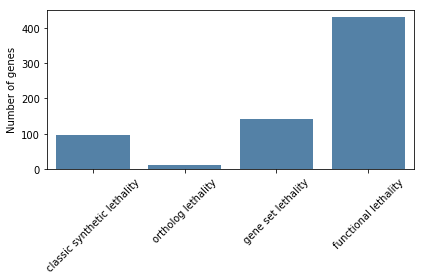

In [128]:
ax = sns.barplot(df_counts['lethality'], df_counts['sum'], color='steelblue')
ax.set(xlabel='', ylabel='Number of genes')
plt.xticks(rotation=45)
plt.tight_layout()